In [1]:
import sys
!conda install --yes --prefix {sys.prefix} polars

Channels:
 - defaults
 - conda-forge
 - jetbrains
Platform: linux-64
Solving environment: done

# All requested packages already installed.



In [2]:
from lets_plot import *
from lets_plot.bistro import *


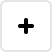
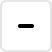
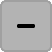
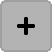
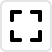
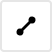
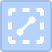
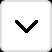
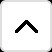
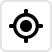
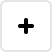
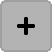
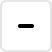
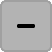
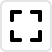
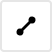
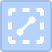
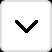
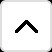
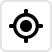

In [3]:
LetsPlot.setup_html()

In [4]:
waterfall_plot?

Signature:
waterfall_plot(
    data,
    x,
    y,
    *,
    color=None,
    fill=None,
    size=None,
    alpha=None,
    linetype=None,
    width=None,
    show_legend=None,
    tooltips=None,
    sorted_value=None,
    threshold=None,
    max_values=None,
    calc_total=None,
    total_title=None,
    hline=None,
    hline_ontop=None,
    connector=None,
    label=None,
    label_format=None,
) -> lets_plot.plot.core.PlotSpec
Docstring:
A waterfall plot shows the cumulative effect of sequentially introduced positive or negative values.

Parameters
----------
data : dict or Pandas `DataFrame`
    The data to be displayed.
x : str
    Name of a variable. All values should be distinct.
y : str
    Name of a numeric variable.
color : str
    Color of the box boundary lines.
fill : str
    Fill color of the boxes.
size : float, default=0.0
    Line width of the box boundary lines.
alpha : float
    Transparency level of the boxes. Accept values between 0 and 1.
linetype : int or str
   

In [5]:
import polars as pl

df1 = pl.DataFrame({'X': ['A', 'B'], 'Y': [-1, 2]})

waterfall_plot(df1, 'X', 'Y').as_dict()

{'data': shape: (2, 2)
 ┌─────┬─────┐
 │ X   ┆ Y   │
 │ --- ┆ --- │
 │ str ┆ i64 │
 ╞═════╪═════╡
 │ A   ┆ -1  │
 │ B   ┆ 2   │
 └─────┴─────┘,
 'bistro': {'name': 'waterfall', 'x': 'X', 'y': 'Y'},
 'kind': 'plot',
 'scales': [],
 'layers': [],
 'metainfo_list': []}


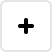
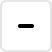
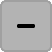
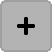
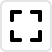
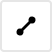
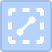
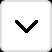
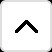
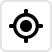
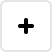
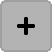
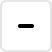
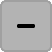
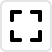
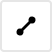
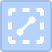
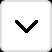
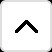
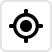

In [6]:
import numpy as np
from lets_plot import *
from lets_plot.bistro.waterfall import *
LetsPlot.setup_html()
categories = list("ABCDEF")
np.random.seed(42)
data = {
    'x': categories,
    'y': np.random.normal(size=len(categories))
}
waterfall_plot(data, 'x', 'y')


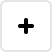
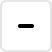
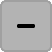
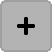
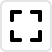
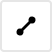
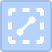
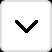
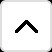
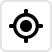
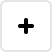
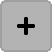
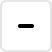
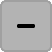
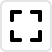
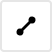
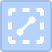
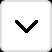
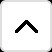
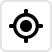

In [7]:
import numpy as np
from lets_plot import *
from lets_plot.bistro.waterfall import *
LetsPlot.setup_html()
n, m = 10, 5
categories = list(range(n))
np.random.seed(42)
data = {
    'x': categories,
    'y': np.random.randint(2 * m + 1, size=len(categories)) - m
}
waterfall_plot(data, 'x', 'y', \
               threshold=2, \
               width=.7, size=1, fill="white", color='flow_type', \
               hline=element_line(linetype='solid'), hline_ontop=False, \
               connector=element_line(linetype='dotted'), \
               label=element_text(color='flow_type'), \
               total_title="Result", show_legend=True)


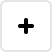
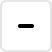
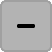
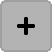
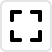
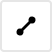
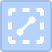
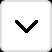
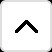
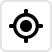
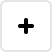
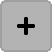
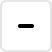
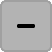
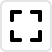
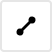
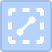
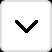
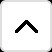
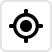

In [8]:
import numpy as np
from lets_plot import *
from lets_plot.bistro.waterfall import *
LetsPlot.setup_html()
categories = list("ABCDEFGHIJKLMNOP")
np.random.seed(42)
data = {
    'x': categories,
    'y': np.random.uniform(-1, 1, size=len(categories))
}
waterfall_plot(data, 'x', 'y', sorted_value=True, max_values=5, calc_total=False, \
               tooltips=layer_tooltips().title("Category: @x")
                                        .format("@initial", ".2~f")
                                        .format("@cumsum", ".2~f")
                                        .format("@dy", ".2~f")
                                        .line("@{flow_type}d from @initial to @cumsum")
                                        .line("Difference: @dy")
                                        .disable_splitting(), \
               size=1, alpha=.5, \
               label=element_text(color="black"), label_format=".4f")